# 1 - Introduction to Machine learning with scikit learn

Remember we make the following distinction:
* **Supervised** models try to predict a (dependent) variable, called the *target*, that is available during training time
* **Unsupervised** models try to find structure or patterns in the data, without a specific target

### Exercise: Supervised or unsupervised
For the following problems, do you think you need a supervised or unsupervised approach?
* Find numerical representations for words in a language (*word vectors*) that contain semantic information on the word
* Determine whether a tumor is benign or malign, based on an MRI-scan
* Predict the age of a  patient, based on an EEG-scan
* Cluster observations of plants into groups of individuals that have similar properties, possibly belonging to the same species
* Your own problem and dataset

## Machine learning workflow
For most machine learning approaches, we have to take the following steps:
* Data cleaning and preperation
* Split data into train and test set
* Optional: Feature selection
* Use cross validation to:
  * Train one or more ML models on the train set
  * Choose optimal model / parameter settings based on some metric
* Calculate final model performance on the test set

### Exercise: test set
Discuss in groups: Why is it important to reserve part of your data as test set? What can go wrong in choosing a test set?

## Penguin data set
In this episode we will be using the [penguin dataset](https://zenodo.org/record/3960218), this is a dataset that was published in 2020 by Allison Horst and contains data on three different species of the penguins.

We will use the penguin dataset to train a neural network which can classify which species a
penguin belongs to, based on their physical characteristics.

The `palmerpenguins` data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.
The physical attributes measured are flipper length, beak length, beak width, body mass, and sex.

![Illustration of the three species of penguins found in the Palmer Archipelago, Antarctica: Chinstrap, Gentoo and Adele](https://github.com/allisonhorst/palmerpenguins/raw/e5bfd5f2c7da95b0823e9501b9013eb2ef124fa7/man/figures/lter_penguins.png)
*Artwork by @allison_horst*

![Illustration of the beak dimensions called culmen length and culmen depth in the dataset](https://github.com/allisonhorst/palmerpenguins/raw/e5bfd5f2c7da95b0823e9501b9013eb2ef124fa7/man/figures/culmen_depth.png)
*Artwork by @allison_horst*

These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the [Palmer Station Long Term Ecological Research Program](https://pal.lternet.edu/), part of the [US Long Term Ecological Research Network](https://lternet.edu/). The data were imported directly from the [Environmental Data Initiative](https://environmentaldatainitiative.org/) (EDI) Data Portal, and are available for use by CC0 license ("No Rights Reserved") in accordance with the [Palmer Station Data Policy](https://pal.lternet.edu/data/policies).

To identify the inputs and outputs that we will use to design the neural network we need to familiarize
ourselves with the dataset. This step is sometimes also called data exploration.

We will start by importing the [Seaborn](https://seaborn.pydata.org/) library that will help us get the dataset and visualize it.
Seaborn is a powerful library with many visualizations. Keep in mind it requires the data to be in a
pandas dataframe, luckily the datasets available in seaborn are already in a pandas dataframe.

In [1]:
import seaborn as sns

We can load the penguin dataset using

In [2]:
penguins = sns.load_dataset('penguins')

## Exercise: explore penguin dataset
>
> Use seaborn to load the dataset and inspect the mentioned attributes.
> 1. What are the different features called in the dataframe?
> 2. Are the target classes of the dataset stored as numbers or strings?
> 3. How many samples does this dataset have?

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


The name of the target variable is `species` and is stored as strings.
All other columns can be used as features.
To get the number of samples:

In [4]:
len(penguins)

344

### Split into train and test
Before doing further exploration of the data, we held out part of the data as test set for later. This way, no information from the test set will leak to the model we are going to create

In [5]:
from sklearn.model_selection import train_test_split

In [15]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.2, shuffle=True, random_state=0)

In [16]:
len(penguins_train), len(penguins_test)

(275, 69)

We write the train and test set to csv files because we will be needing them later. We create the data directory if it does not exist.

In [17]:
import os

if not os.path.exists('data'):
    os.mkdir('data')
penguins_train.to_csv('data/penguins_train.csv', index=False)
penguins_test.to_csv('data/penguins_test.csv', index=False)

## Some more data exploration using visualization
Let's visualize the numerical feature columns.
One nice visualization for datasets with relatively few attributes is the Pair Plot.
This can be created using `sns.pairplot(...)`. It shows a scatterplot of each attribute plotted against each of the other attributes.
By using the `hue='species'` setting for the pairplot the graphs on the diagonal are layered kernel density estimate plots.

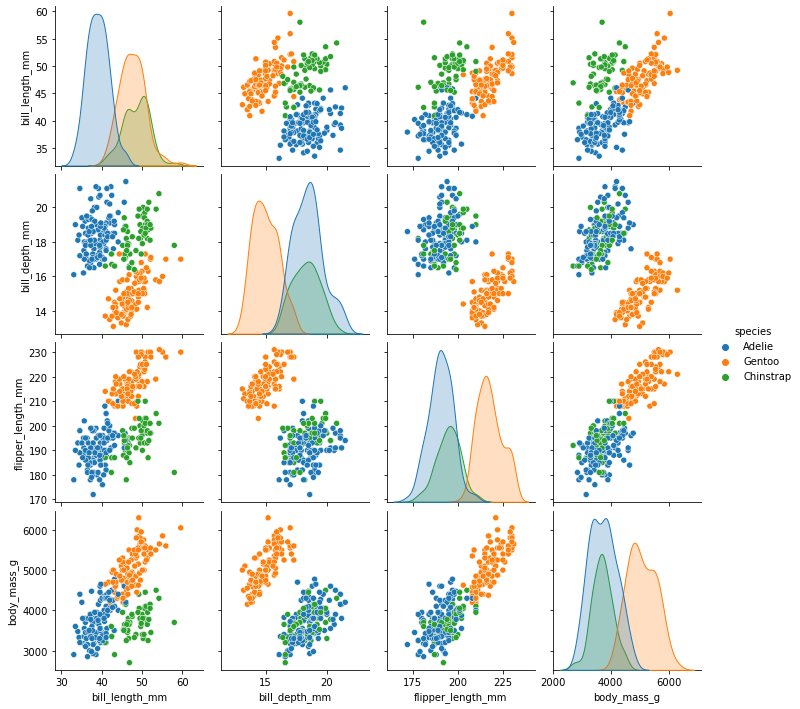

In [18]:
sns.pairplot(penguins_train, hue='species')

> ### Exercise: Create the pairplot using Seaborn
>
> Use the seaborn pairplot function to create a pairplot
> * Is there any class that is easily distinguishable from the others?
> * Which combination of attributes shows the best separation?
> * What do you note about the units of the different attributes?